**Homework 5**
- Problem 1 PCA from pcademo3.py
- PCA/SVD Interplay
- Simple PCA on a Matrix
- Project Ideas
- Feedback

In [12]:
#import libs
import numpy as np
import matplotlib.pyplot as plt

Problem 1:
-
Modify pcademo3.py shown as function below instead of import.

1. It now works on a 2D dataset.
2. I changed the covariance to numpy.cov instead of matrix mul
3. Takes X as an input where X can be passed from main.
4. Tailored to 2D, had to remove the org_data lines


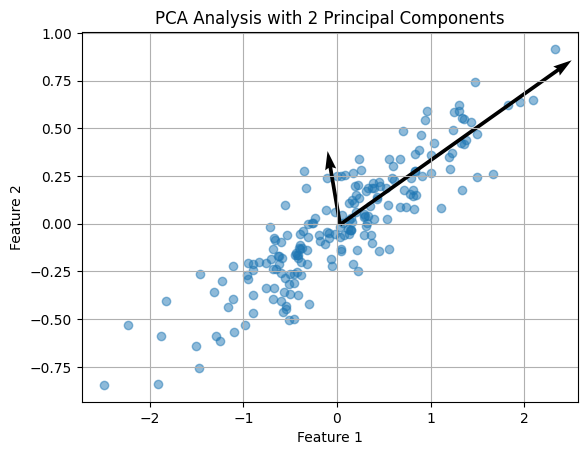

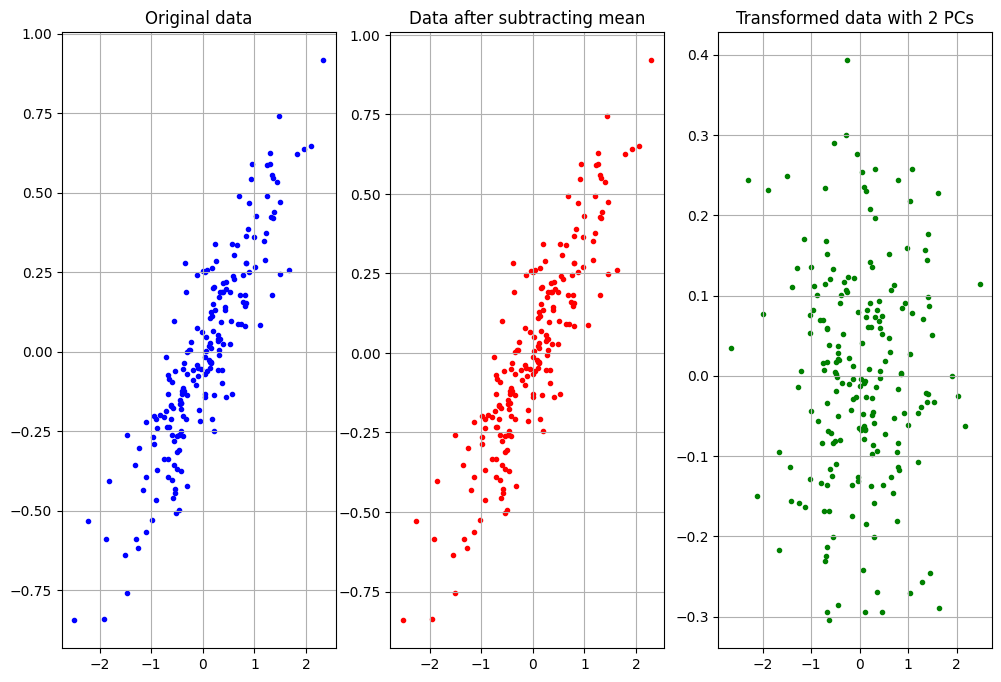

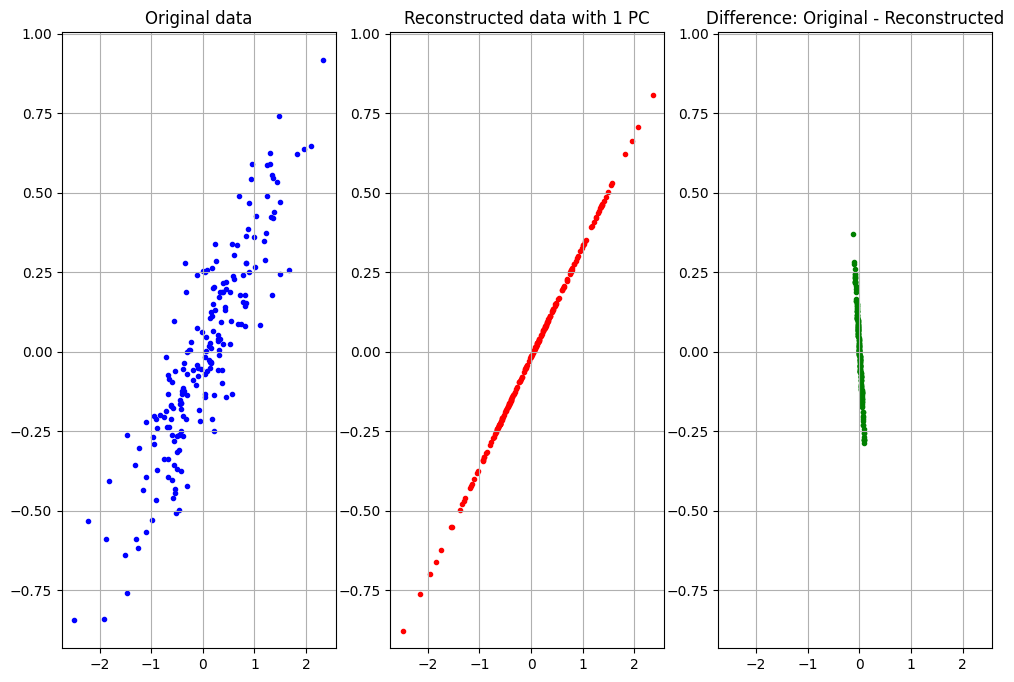

In [13]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T


def runme(X):
    #center data
    mean = np.mean(X, axis=0)
    centered_data = X - mean

    #covariance matrix (using cov not matmul)
    cov_matrix = np.cov(centered_data.T)

    # eigendecomp
    eig_values, eig_vectors = np.linalg.eig(cov_matrix)

    # sort eigen vects and values
    sorted_indices = np.argsort(eig_values)[::-1]
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]

    # transform data based on eigen vectors
    transformed_data = np.dot(centered_data, eig_vectors)

    #og data + principle component vectors
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
    for length, vector in zip(eig_values, eig_vectors.T):
        v = vector * 3 * np.sqrt(length)
        plt.quiver(mean[0], mean[1], v[0], v[1], angles='xy', scale_units='xy', scale=1)

    plt.title('PCA Analysis with 2 Principal Components')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()


    #plot og data, data - mean and transformed
    fig, ax = plt.subplots(1, 3, figsize=(12, 8))

    #plot original data
    ax[0].scatter(X[:, 0], X[:, 1], color='blue', marker='.')
    # Set title
    ax[0].set_title('Original data')

    #plot data after subtracting mean
    ax[1].scatter(centered_data[:, 0], centered_data[:, 1], color='red', marker='.')
    # Set title
    ax[1].set_title('Data after subtracting mean')

    #plot transformed data
    ax[2].scatter(transformed_data[:, 0], transformed_data[:, 1], color='green', marker='.')
    # Set title
    ax[2].set_title('Transformed data with 2 PCs')

    #grid on
    for i in range(3):
        ax[i].grid('on')

    #show, uneccessary in notebook style but keeping close to source.
    plt.show()

    #PCA with 1 pc
    transformed_data_1_pc = np.dot(centered_data, eig_vectors[:, 0].reshape(-1, 1))

    #reconstuction from 1 pc
    recon_data_1_pc = transformed_data_1_pc.dot(eig_vectors[:, 0].reshape(-1, 1).T) + mean

    #og data from pc reconstruction
    fig, ax = plt.subplots(1, 3, figsize=(12, 8))


    ax[0].scatter(X[:, 0], X[:, 1], color='blue', marker='.')
    xl = ax[0].get_xlim()
    yl = ax[0].get_ylim()
    # Set title
    ax[0].set_title('Original data')

    #plt reconstruct
    ax[1].scatter(recon_data_1_pc[:, 0], recon_data_1_pc[:, 1], color='red', marker='.')
    ax[1].set_xlim(xl)
    ax[1].set_ylim(yl)
    # Set title
    ax[1].set_title('Reconstructed data with 1 PC')

    #delta reconstructed and og
    ax[2].scatter(X[:, 0] - recon_data_1_pc[:, 0], X[:, 1] - recon_data_1_pc[:, 1], color='green', marker='.')
    ax[2].set_xlim(xl)
    ax[2].set_ylim(yl)
    # Set title
    ax[2].set_title('Difference: Original - Reconstructed')

    #grid on
    for i in range(3):
        ax[i].grid('on')


    plt.show()

runme(X)


**Problem 2**

- *Manual PCA*

1. Create a random array.
2. Mean center the data.
3. Compute the covariance matrix.
4. Perform eigendecomposition and sort the eigenvalues.
5. Perform PCA and compute the principal components.
6. Reconstruct the data.


In [14]:
#Exercise 2 Part 1
#set size
m = 7
n = 3

#rand m x n matrix
data_mat = np.random.rand(m,n)
print('the random matrix is :\n',data_mat)

data_mat_meansubbed = data_mat - np.mean(data_mat, axis = 0)
print('the mean subbed matrix looks like: \n', data_mat_meansubbed)

#covariance but using matrix multiplication not cov
#meansubbed_transposed dot meansubbed matrix
cov = np.matmul(data_mat_meansubbed.T, data_mat_meansubbed)
print('the covariance matrix looks like:\n', cov,'\n and is of size :', cov.shape)

#eigen decomp & sort
eig_val, eig_vec = np.linalg.eigh(cov)
indices = np.argsort(eig_val)[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:, indices]

#pca & compute
pca_data = data_mat_meansubbed.dot(eig_vec)

#reconstruction
data_mat_recon = pca_data.dot(eig_vec.T) + np.mean(data_mat, axis=0)


#now lets do svd on MCD
U, S, VT = np.linalg.svd(data_mat_meansubbed)


#compare:
print('Eigenvectors from PCA:')
print(eig_vec)

print('VT from SVD:')
print(VT)


#look at eigenvalues from PCA & singular squares
print('Eigenvalues from PCA:')
print(eig_val)
print('Square of Singular values from SVD:')
print(S**2)

#round and abs for machine error
diff = abs(np.round(eig_val - (S**2), 2))

print(f'The difference between eigenvalue and singular value squared is: {diff}')



the random matrix is :
 [[0.1933682  0.5663903  0.87539627]
 [0.70117117 0.31209016 0.86662707]
 [0.20951162 0.22304286 0.80341319]
 [0.64122957 0.08382604 0.81148711]
 [0.32268574 0.98890992 0.11930231]
 [0.08845243 0.07533608 0.85162288]
 [0.86169227 0.22155811 0.82453347]]
the mean subbed matrix looks like: 
 [[-0.23779052  0.21336837  0.13934166]
 [ 0.27001246 -0.04093176  0.13057246]
 [-0.22164709 -0.12997907  0.06735858]
 [ 0.21007086 -0.26919588  0.07543249]
 [-0.10847298  0.635888   -0.61675231]
 [-0.34270628 -0.27768585  0.11556827]
 [ 0.43053356 -0.13146381  0.08847885]]
the covariance matrix looks like:
 [[ 0.53728138 -0.11994135  0.0684265 ]
 [-0.11994135  0.63530816 -0.44058361]
 [ 0.0684265  -0.44058361  0.44826044]] 
 and is of size : (3, 3)
Eigenvectors from PCA:
[[-0.2668648   0.96231552  0.05226872]
 [ 0.75285848  0.17430604  0.63468222]
 [-0.6016538  -0.20872529  0.77100354]]
VT from SVD:
[[ 0.2668648  -0.75285848  0.6016538 ]
 [ 0.96231552  0.17430604 -0.20872529]
 

In [15]:
#repeat
# set size
m = 9
n = 3

# rand m x n matrix
data_mat = np.random.rand(m, n)
print('the random matrix is :\n', data_mat)

# mean subtraction
data_mat_meansubbed = data_mat - np.mean(data_mat, axis=0)
print('the mean subbed matrix looks like: \n', data_mat_meansubbed)

# covariance but using matrix multiplication not cov
# meansubbed_transposed dot meansubbed matrix
cov = np.matmul(data_mat_meansubbed.T, data_mat_meansubbed)
print('the covariance matrix looks like:\n', cov, '\n and is of size :', cov.shape)

# eigen decomposition & sort
eig_val, eig_vec = np.linalg.eigh(cov)
indices = np.argsort(eig_val)[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:, indices]

# pca & compute
pca_data = data_mat_meansubbed.dot(eig_vec)

# reconstruction
data_mat_recon = pca_data.dot(eig_vec.T) + np.mean(data_mat, axis=0)

# now lets do svd on MCD
U, S, VT = np.linalg.svd(data_mat_meansubbed)

# compare:
print('Eigenvectors from PCA:')
print(eig_vec)

print('VT from SVD:')
print(VT)

# look at eigenvalues from PCA & singular squares
print('Eigenvalues from PCA:')
print(eig_val)
print('Square of Singular values from SVD:')
print(S**2)


#round and abs for machine error
diff = abs(np.round(eig_val - (S**2), 2))

print(f'The difference between eigenvalue and singular value squared is: {diff}')


the random matrix is :
 [[0.73836018 0.89015508 0.18208446]
 [0.44805016 0.59547815 0.12732246]
 [0.40486026 0.30780668 0.28755374]
 [0.22593243 0.41542696 0.92165995]
 [0.75271916 0.38183402 0.68044461]
 [0.98089918 0.46075578 0.60137568]
 [0.91019735 0.58104711 0.85698871]
 [0.6808952  0.69115816 0.25990472]
 [0.41530593 0.42435775 0.93178356]]
the mean subbed matrix looks like: 
 [[ 0.12089131  0.36259733 -0.35670642]
 [-0.16941871  0.06792041 -0.41146842]
 [-0.21260861 -0.21975106 -0.25123713]
 [-0.39153644 -0.11213078  0.38286908]
 [ 0.13525028 -0.14572372  0.14165373]
 [ 0.36343031 -0.06680197  0.0625848 ]
 [ 0.29272848  0.05348937  0.31819784]
 [ 0.06342633  0.16360041 -0.27888616]
 [-0.20216295 -0.10319999  0.39299268]]
the covariance matrix looks like:
 [[ 0.52277756  0.12586275 -0.03199207]
 [ 0.12586275  0.2629282  -0.23899531]
 [-0.03199207 -0.23899531  0.86370779]] 
 and is of size : (3, 3)
Eigenvectors from PCA:
[[-0.16763658  0.94475022 -0.28168244]
 [-0.34695695  0.2109

# Comparison of PCA and SVD

1. **Similarity**
   - They are very similar, in pca we want to find the axis that the data has the most variance.
   
2. **PCA**
   - When doing the cov matrix and its eigenvalues we are finding the variance capture along each of the new axis `pc`.

3. **SVD**
   - In SVD, we decompose into three other matrices but the S values are the singular values which also tells us about the variance about other directions (like U or Vt).

4. **Linking the Concepts**
   - If we square the values we are doing the same thing we do when finding eigenvalues in the covariance matrix in pca.
   - Essentially PCA eigenvalues of the covariance matrix ARE the squared singular values from SVD.


**Problem 3**

- *Simple PCA Calculation*

1. Create a python script (not doing that here in notebook)
2. I would create the function in another script then `import pca` or `from pca import function`
3. Manually perform PCA
4. I did organize as function -> call to function as I would in main()

In [16]:
#function to perform pca manually, passed array and principle componenets (default 3)
def perform_pca(data, n_components=3):
    #mean center data
    mean_vec = np.mean(data, axis=0)
    data_centered = data - mean_vec

    #covariance matrix, will use cov this time instead of matmul
    cov_mat = np.cov(data_centered, rowvar=False)


    #eigen vectors and values
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

    #sort
    eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)

    #projection
    eigenvectors_sorted = np.hstack([eig_pairs[i][1].reshape(data.shape[1], 1) for i in range(n_components)])
    data_pca = np.dot(data_centered, eigenvectors_sorted)


    print(f'Results with {n_components} principal components:')
    print(data_pca)

    return data_pca

#intilize array
data = np.array([[7., 4., 3.],
               [4., 1., 8.],
               [6., 3., 5.],
               [8., 6., 1.],
               [8., 5., 7.],
               [7., 2., 9.],
               [5., 3., 3.],
               [9., 5., 8.],
               [7., 4., 5.],
               [8., 2., 2.]])

#call with n=3
perform_pca(data, n_components=3)

#call with n=2
perform_pca(data, n_components=2)


Results with 3 principal components:
[[-2.15142276 -0.17311941  0.10681648]
 [ 3.80418259 -2.88749898  0.5104355 ]
 [ 0.15321328 -0.98688598  0.26941001]
 [-4.7065185   1.30153634  0.65167999]
 [ 1.29375788  2.27912632  0.44919235]
 [ 4.0993133   0.1435814  -0.80312818]
 [-1.62582148 -2.23208282  0.80281431]
 [ 2.11448986  3.2512433  -0.16837351]
 [-0.2348172   0.37304031  0.27513962]
 [-2.74637697 -1.06894049 -2.09398657]]
Results with 2 principal components:
[[-2.15142276 -0.17311941]
 [ 3.80418259 -2.88749898]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]]


array([[-2.15142276, -0.17311941],
       [ 3.80418259, -2.88749898],
       [ 0.15321328, -0.98688598],
       [-4.7065185 ,  1.30153634],
       [ 1.29375788,  2.27912632],
       [ 4.0993133 ,  0.1435814 ],
       [-1.62582148, -2.23208282],
       [ 2.11448986,  3.2512433 ],
       [-0.2348172 ,  0.37304031],
       [-2.74637697, -1.06894049]])

# Course Project

- **Group Mate.**
I will be collaborating with Nate L. from our class. We are brainstorming various ideas and have initiated a few projects but haven't completed any as of now.

**Option 1: Gravity N-Body Simulation**
Utilizing libraries such as sympy, numpy, astroquery, and matplotlib to:

1. Retrieve actual star position data from GAIA (could also use random gaussian distribution, it doesn't really matter).
2. Calculate differentials for velocity considering a given time differential (dt), determine the position of each 'particle' based on the mass and previous dt position.
3. Create a 3D animation using matplotlib. We are considering using arcade + openGL for shaders, depending on the time constraints. Currently, we are utilizing matplotlib.
4. Log the parameters such as position (x,y,z), mass (M), velocity (v_x,v_y,v_z) and force (F_x,F_y,F_z) at every given dt in a csv file, and then read it as a dataframe.
5. Potentially analyze trajectories, and study the conservation of energy in the system, however PE increases drastically a n --> even at 100 its horribly inefficient. Would need to have a parewise function and define a 'distance' where we can safely ignore PE due to PE falling off with `r**2`

**Option 2: JPL NEO Dataset / MCMC**
Would love to run an MCMC analysis on this. I tried and got an output but I can't read a corner plot to save my life. I don't understand the theory going on behind the curtain. I can just see how other people implemented on stack overflow/youtube but I'm lacking the principles behind it and so is nate.

# Feedback thus far


**Satisfaction**

I am very satisfied with the class.

**Things that are working:**
 1. Materials Hosted on Git, this is way cleaner than canvas. I like this.
 2. Concepts are mostly clear, you seem open to questions as they arise
 3. Homework is challenging in a very good way, I can tell the questions are tailored to get us to learn a certain concept. There is no problem I've done where I've gone 'hmm, i wonder what i was supposed to get out of this?'
 4. Notes are so very detailed, you've put a lot of time into it and I study it like the bible. It is not going to waste.

**Things that are *not* working:**

 1. When you do python from the CLI/Command line I think it hinders a lot of students (including myself) from getting the full picture of what all the lines are doing. You've allewd to it multiplie times but I think an IDE or more specfically a notebook style env would work way better. It seems to take a lot of time to copy from the .pdf or .md document and is prone to indendation errors. I feel that we could be getting further without the hangups. Some great options are Jyupter Labs, or Google Collab (I've recently fallen in love with it). Since you can do a mix of markdown and python you should be able to run your examples stright from the notes, no copy/paste or indentation errors.
 2. I think the pivot to change the grading structure to 80% homework was good as it would be easier than taking a grade each class for in class assignments. However, I'd like to see more actual homework problems or optional problems. This may just be me, but when I do the problems in class I feel like I don't have homework problems to work through. I do utitlize other online problem sets just to make sure i'm getting the correct amount of comprehension.
 3. This isn't a problem for me, but I know some students are still having internet issues and pushing to git last minute may not let them get the notes.

**Overall Experience:**

Overall I'm very satisfied with the class. I spend about 80% of my school time with materials form this class (partly because I lothe my other class). Its not an 'easy' class and one must work for it but it is very worth it if you put the time in. I'm even using some of these techinquies now at work.

I always leave little easter eggs in my homeworks because I'm curious if my professors are actually grading them. You passed!

I am also very aware that since this is the first time you're teaching the class your notes are fresh and newly being created. Just looking at the magnitude of pages you're churning out I can tell how much work that takes. Just know its not to waste, i do read them in full and will likely reference them long after this class is over.

I think you've done a good job at making it accessable for people with different levels of comfort in python. Looking forward to the rest of the semester.